In [101]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Data Loading

In [102]:
df = pd.read_csv("adult.csv")

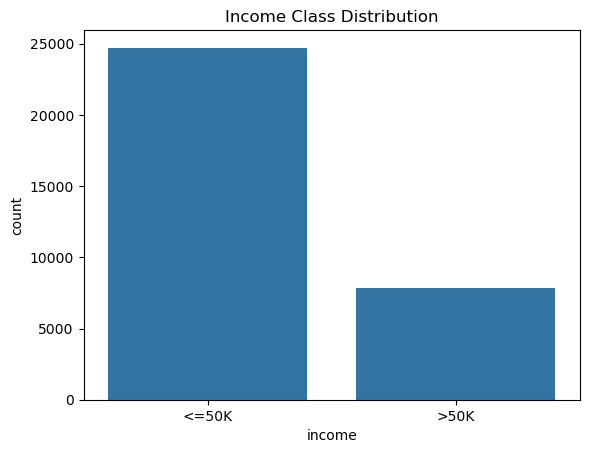

In [103]:
sns.countplot(x="income", data=df)
plt.title("Income Class Distribution")
plt.show()

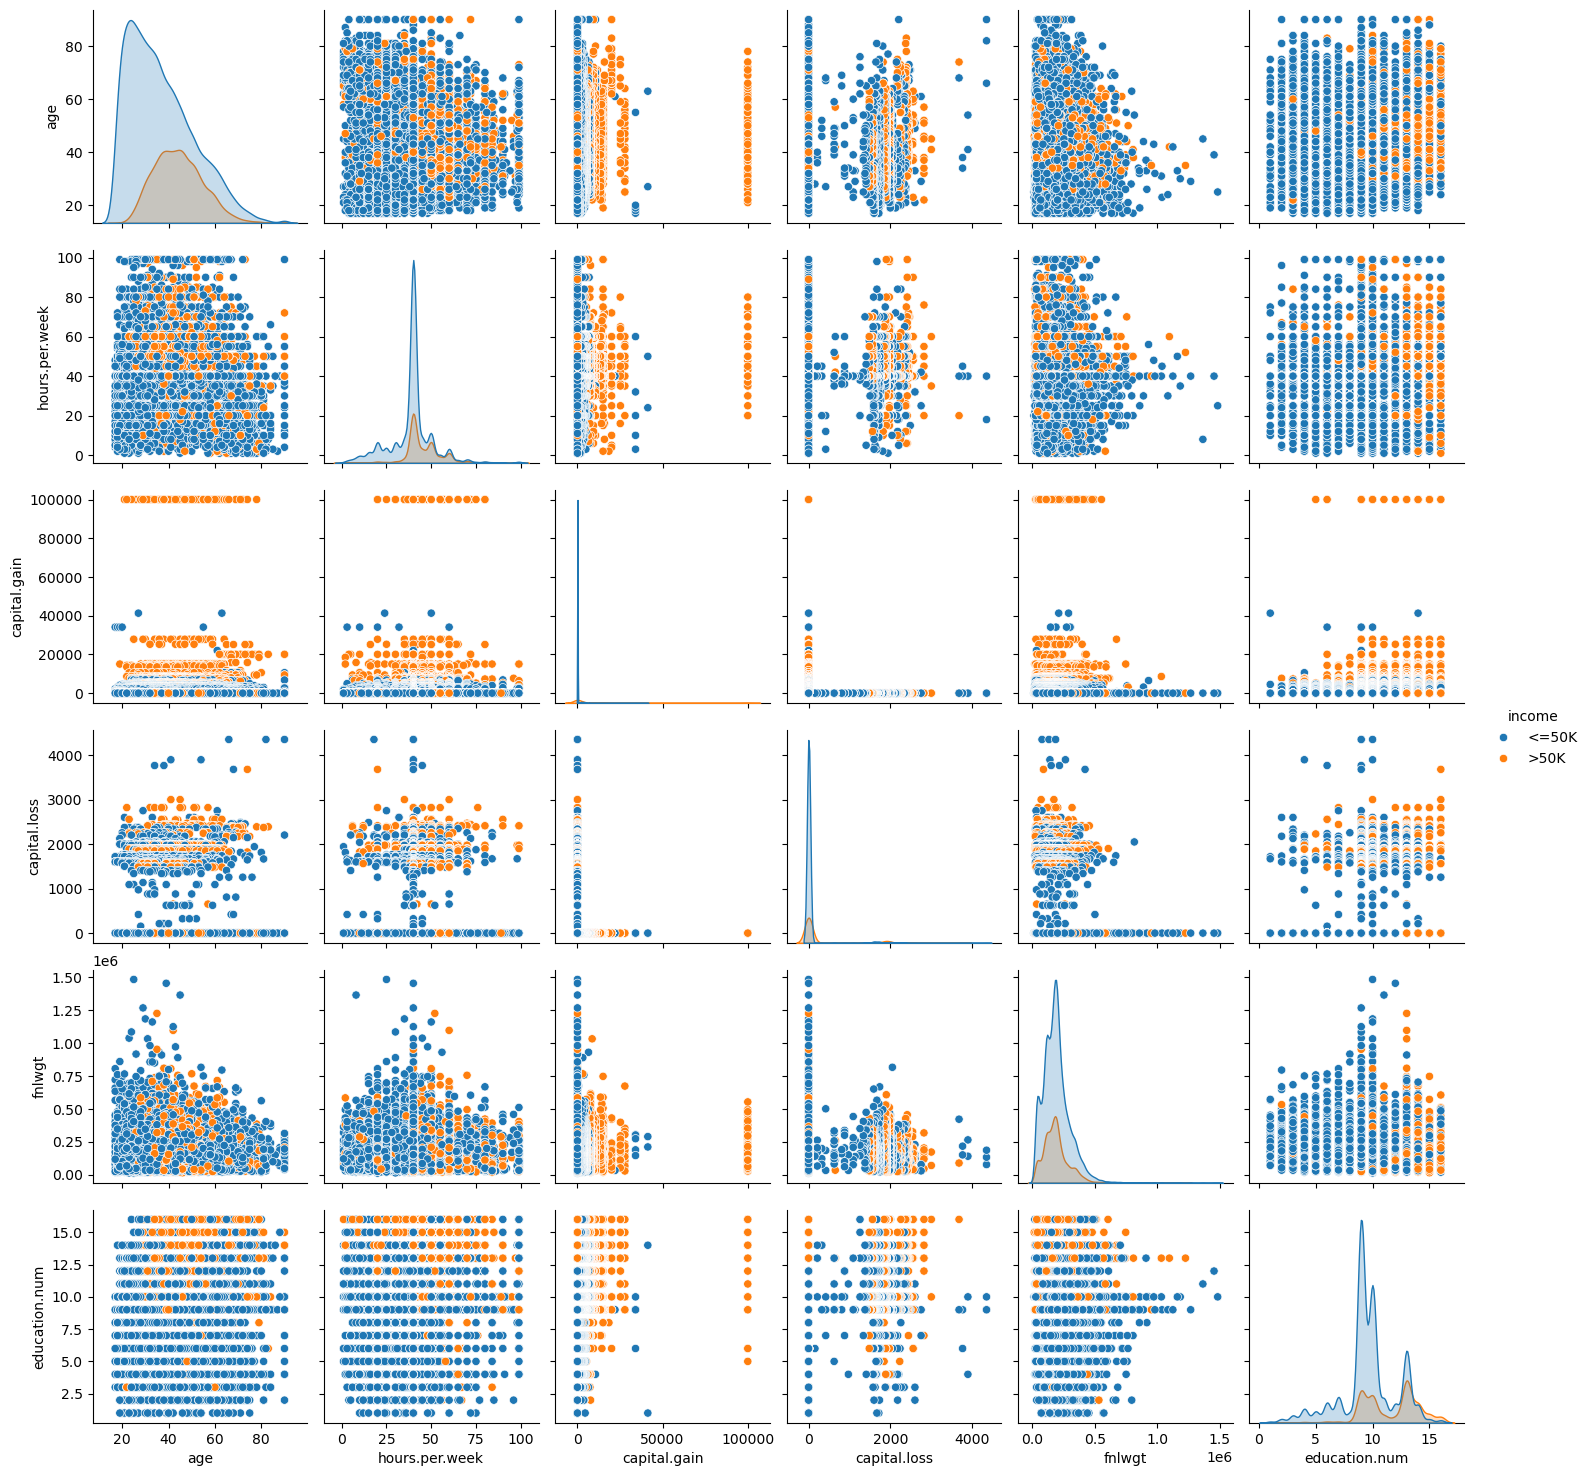

In [104]:
subset_features = [
    "age",
    "hours.per.week",
    "capital.gain",
    "capital.loss",
    "education",
    "income",
    "native.country",
    "sex" ,
    "occupation", 
    "race",
    "workclass" ,
    "fnlwgt",
    "education.num" ,
    "marital.status",
    "relationship" ,

]
adult_subset_df = df[subset_features]
sns.pairplot(adult_subset_df, hue="income")

Data Splitting

In [105]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
   
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [106]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
def get_preprocessed_data(df) -> Tuple[np.ndarray]:
    X = df.drop("income", axis=1)
    y = (df["income"] == ">50K").values  
    
    
    encoder = OneHotEncoder(sparse_output=False)
    y_1hot = encoder.fit_transform(y.reshape(-1, 1))
    
    
    
    X_temp, X_tst, y_temp, y_tst = train_test_split(
        X, y_1hot, test_size=0.2, stratify=y, random_state=42
    )
    
    X_trn, X_vld, y_trn, y_vld = train_test_split(
        X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
    )
    
    num_cols = ["age", "hours.per.week", "capital.gain", "capital.loss"]
    cat_cols = [c for c in X.columns if c not in num_cols]
    
    
    cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    X_trn_cat = cat_encoder.fit_transform(X_trn[cat_cols])
    X_vld_cat = cat_encoder.transform(X_vld[cat_cols])
    X_tst_cat = cat_encoder.transform(X_tst[cat_cols])
    
    
    scaler = StandardScaler()
    X_trn_num = scaler.fit_transform(X_trn[num_cols])
    X_vld_num = scaler.transform(X_vld[num_cols])
    X_tst_num = scaler.transform(X_tst[num_cols])
    
    
    X_trn = np.hstack([X_trn_num, X_trn_cat])
    X_vld = np.hstack([X_vld_num, X_vld_cat])
    X_tst = np.hstack([X_tst_num, X_tst_cat])
    
   
    X_trn = np.hstack([np.ones((X_trn.shape[0], 1)), X_trn])
    X_vld = np.hstack([np.ones((X_vld.shape[0], 1)), X_vld])
    X_tst = np.hstack([np.ones((X_tst.shape[0], 1)), X_tst])
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

Accuracy

In [107]:
def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
    y = y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)

    
    are_same = (y == y_hat)

    
    total_correct = np.sum(are_same)

    
    total_samples = len(y)

    
    print(f"Accuracy ratio: {total_correct}/{total_samples}")

    
    return total_correct / total_samples

In [108]:
import numpy as np


y_true = np.array([0, 1, 1, 0, 1])
y_pred = np.array([0, 1, 0, 0, 1])


acc = accuracy(y_true, y_pred)


print(f"Accuracy score: {acc:.2f}")

Accuracy ratio: 4/5
Accuracy score: 0.80


KNearestNeighbors

In [ ]:
import numpy as np
from typing import Callable

class KNearestNeighbors:
    """
    Simple implementation of the K-Nearest Neighbors algorithm.

    Attributes:
        k (int): Number of nearest neighbors.
        distance_measure (Callable): Function to compute distance between points.
        X (np.ndarray): Training input features.
        y (np.ndarray): Training targets/labels.
    """
    def __init__(self, k: int, distance_measure: Callable):
        """
        Args:
            k (int): Number of nearest neighbors.
            distance_measure (Callable): Function that computes a distance measure.
        """
        self.k = k
        self.distance_measure = distance_measure
        self.X: np.ndarray = None
        self.y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Stores the training data for comparison.
        
        Args:
            X (np.ndarray): Training data (2D matrix).
            y (np.ndarray): Training labels (1D vector).
        """
        self.X = X
        self.y = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Performs KNN using stored training data.
        
        Args:
            X (np.ndarray): Testing data (2D matrix).
        
        Returns:
            np.ndarray: Predictions for each data sample in X.
        """
        y_hats = []
        
        for x in X:
           
            distances = self.distance_measure(x, self.X)
            
            
            top_k_idx = np.argsort(distances)[:self.k]
            
            
            nearest_labels = self.y[top_k_idx]
            
           
            counts = np.bincount(nearest_labels)
            
            
            predict = np.argmax(counts)
            
            y_hats.append(predict)
        
        return np.array(y_hats)

In [ ]:
import numpy as np
from typing import Callable

class KNearestNeighbors:
    """
    Simple implementation of the K-Nearest Neighbors algorithm.

    Attributes:
        k (int): Number of nearest neighbors
        distance_measure (Callable): Function to compute distance
        X (np.ndarray): Training input features
        y (np.ndarray): Training targets/labels
    """
    def __init__(self, k: int, distance_measure: Callable):
        self.k = k
        self.distance_measure = distance_measure
        self.X: np.ndarray = None
        self.y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        
        self.X = X
        self.y = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        
        y_hats = []
        for x in X:
            
            distances = self.distance_measure(x, self.X)
            
            top_k_idx = np.argsort(distances)[:self.k]
            
            nearest_labels = self.y[top_k_idx]
           
            counts = np.bincount(nearest_labels)
            predict = np.argmax(counts)
            y_hats.append(predict)
        return np.array(y_hats)

In [111]:
def euclidean_distance(x: np.ndarray, Y: np.ndarray) -> np.ndarray:
    
    
    assert len(Y.shape) == 2, "Y must be a 2D matrix"
   
    difference = Y - x
    square = np.square(difference)
    sum = np.sum(square, axis=1)
    distance = np.sqrt(sum)
    return distance 


knn = KNearestNeighbors(k=5, distance_measure=euclidean_distance)

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(df)
knn.fit(X_trn, y_trn.argmax(axis=1))   



y_hat = knn.predict(X_tst)

print(f"Predictions: {y_hat[:20]}")  


test_acc = accuracy(y=y_tst.argmax(axis=1), y_hat=y_hat)

KeyboardInterrupt: 

Logisitc Regression

In [ ]:
def softmax(z: np.ndarray) -> np.ndarray:
    
   
    z_max = np.max(z, axis=1, keepdims=True)
    z_ = z - z_max

    
    exp_z = np.exp(z_)

    
    sum_exp = np.sum(exp_z, axis=1, keepdims=True)
    return exp_z / sum_exp
    

In [ ]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    

    probs = np.clip(probs, 0, 1.0)

    
    log_probs = y * np.log(probs)

    
    return -np.mean(np.sum(log_probs, axis=1))
    pass

In [ ]:
def get_batches(data_len: int, batch_size: int = 32) -> List[np.ndarray]:
    
    indices = np.arange(data_len)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = {0: "<=50K", 1: ">50K"},
    figsize: Tuple = (8, 6)
) -> pd.DataFrame:
    y = y.flatten()
    y_hat = y_hat.flatten()
    
  
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)
    
    
    labels = np.sort(np.unique(y))
    classes = [class_names.get(l, str(l)) for l in labels]
    
  
    cfm_df = pd.DataFrame(cfm, index=classes, columns=classes)
    
   
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cfm_df, annot=True, fmt='g', cmap="Blues", ax=ax)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Adult Dataset)")
    plt.show()
    
    return cfm_df

In [ ]:
class SoftmaxRegression:
    def __init__(self, alpha: float, batch_size: int, epochs: int = 1, seed: int = 0):
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.W = None
        self.trn_loss = []
        self.vld_loss = []

    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray=None, y_vld: np.ndarray=None):
        np.random.seed(self.seed)
        N, M = X.shape
        K = y.shape[1]
        self.W = np.random.rand(M, K)

        for epoch in range(self.epochs):
            batches = get_batches(N, self.batch_size)
            for batch in batches:
                X_b = X[batch]
                y_b = y[batch]
                B = X_b.shape[0]

                logits = X_b @ self.W
                probs = softmax(logits)
                grad = (1 / B) * (X_b.T @ (probs - y_b))
                self.W -= self.alpha * grad

            
            trn_probs = softmax(X @ self.W)
            self.trn_loss.append(nll_loss(y, trn_probs))

            if X_vld is not None and y_vld is not None:
                vld_probs = softmax(X_vld @ self.W)
                self.vld_loss.append(nll_loss(y_vld, vld_probs))
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        logits = X @ self.W
        return np.argmax(logits, axis=1).reshape(-1, 1)

Training Accuracy: 75.92%


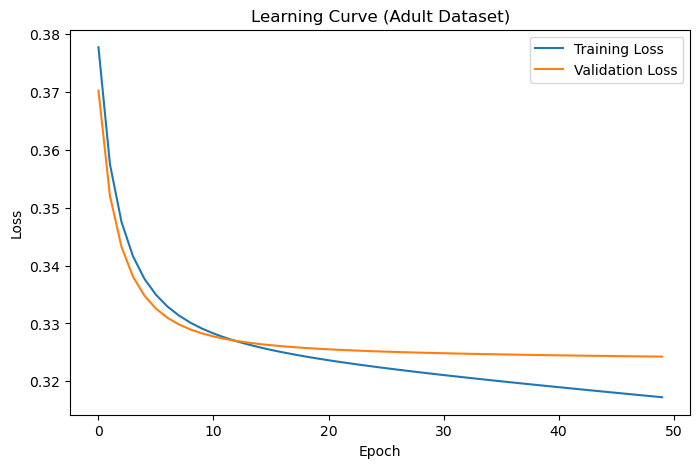

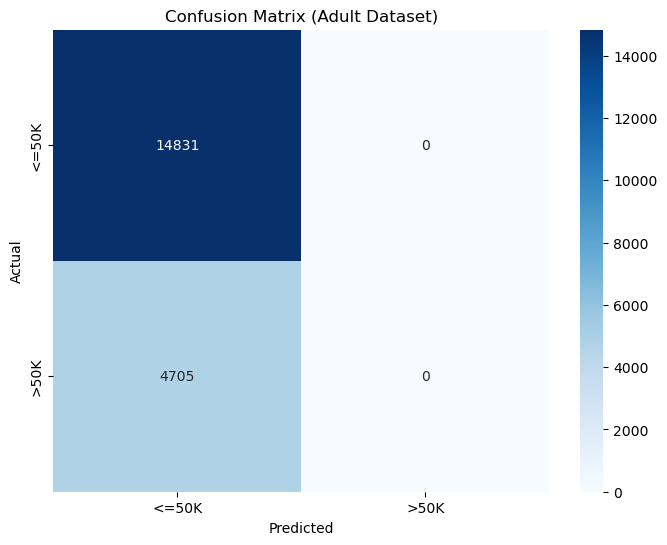

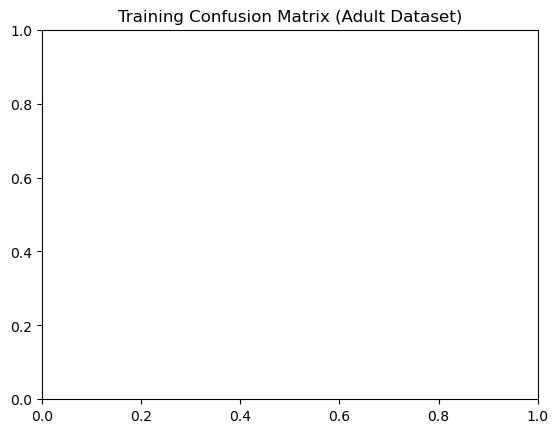

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(df)


y_trn_labels = np.argmax(y_trn, axis=1)
y_vld_labels = np.argmax(y_vld, axis=1)
y_tst_labels = np.argmax(y_tst, axis=1)


model = SoftmaxRegression(
    alpha=0.1,        
    batch_size=128,   
    epochs=50,        
    seed=42           
)


model.fit(
    X_trn, 
    y_trn, 
    X_vld, 
    y_vld
)


trn_losses = model.trn_loss
vld_losses = model.vld_loss


train_preds = np.argmax(model.predict(X_trn), axis=1)
train_acc = np.mean(train_preds == y_trn_labels)
print(f"Training Accuracy: {train_acc * 100:.2f}%")


plt.figure(figsize=(8, 5))
plt.plot(trn_losses, label="Training Loss")
plt.plot(vld_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve (Adult Dataset)")
plt.legend()
plt.show()


plot_confusion_matrix(
    y_trn_labels,    
    train_preds,     
    class_names={0: "<=50K", 1: ">50K"}
)
plt.title("Training Confusion Matrix (Adult Dataset)")
plt.show()

Visualizations

Validation Accuracy: 75.92%


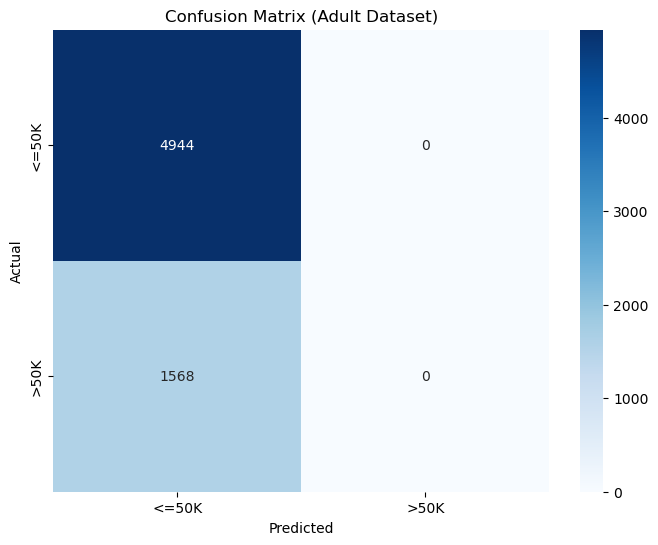

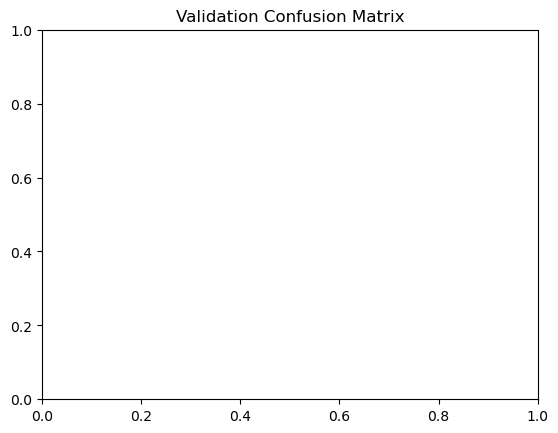

In [ ]:
vld_probs = model.predict(X_vld)
vld_preds = np.argmax(vld_probs, axis=1)


vld_acc = np.mean(vld_preds == y_vld_labels)
print(f"Validation Accuracy: {vld_acc * 100:.2f}%")


plot_confusion_matrix(
    y_vld_labels,     
    vld_preds,        
    class_names={0: "<=50K", 1: ">50K"}
)
plt.title("Validation Confusion Matrix")
plt.show()

Testing Accuracy: 75.93%


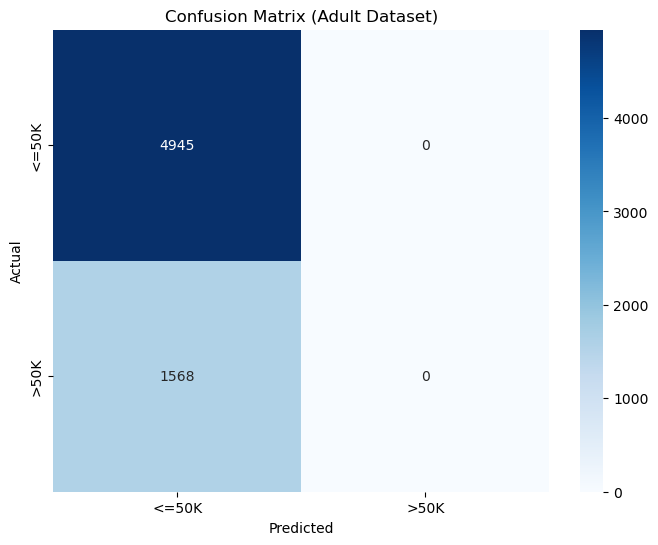

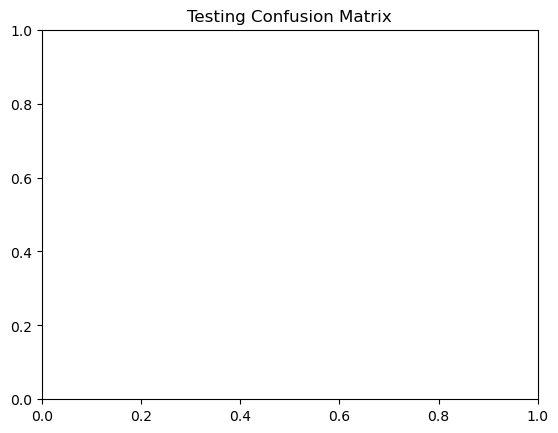

In [114]:
tst_probs = model.predict(X_tst)
tst_preds = np.argmax(tst_probs, axis=1)


tst_acc = np.mean(tst_preds == y_tst_labels)
print(f"Testing Accuracy: {tst_acc * 100:.2f}%")


plot_confusion_matrix(
    y_tst_labels,     
    tst_preds,        
    class_names={0: "<=50K", 1: ">50K"}
)
plt.title("Testing Confusion Matrix")
plt.show()

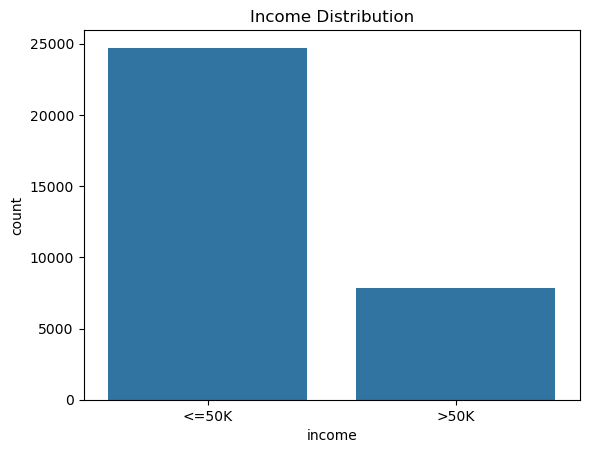

In [ ]:
sns.countplot(x="income", data=df)
plt.title("Income Distribution")
plt.show()

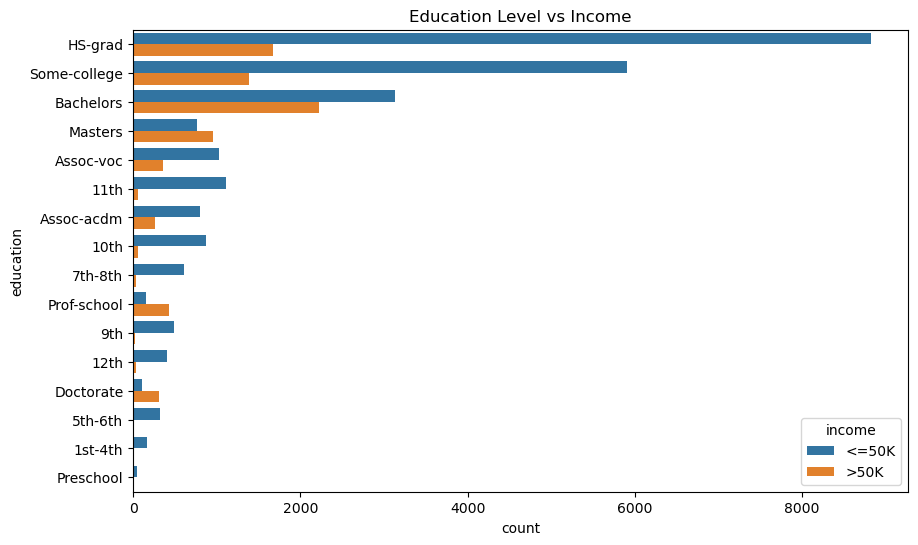

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="education", hue="income", data=df, order=df["education"].value_counts().index)
plt.title("Education Level vs Income")
plt.show()

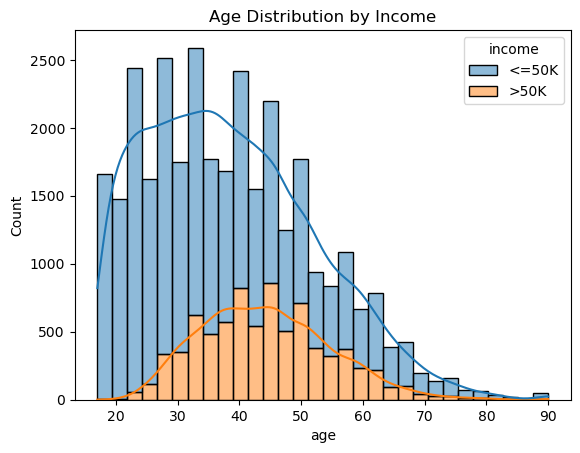

In [ ]:
sns.histplot(data=df, x="age", hue="income", bins=30, kde=True, multiple="stack")
plt.title("Age Distribution by Income")
plt.show()